In [1]:
import os

os.environ['KAGGLE_USERNAME'] = 'kikiru328'
os.environ['KAGGLE_KEY'] = 'f6371f6a038388810664abcff5c4c1bf'

In [2]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:13<00:00, 192MB/s]
100% 2.29G/2.29G [00:13<00:00, 181MB/s]


In [ ]:
!unzip "*.zip"

In [4]:
cd /content/chest_xray

/content/chest_xray


In [65]:
import shutil
shutil.copytree('/content/chest_xray','/content/drive/MyDrive/3차플젝drive/NEWFILE')

'/content/drive/MyDrive/3차플젝drive/NEWFILE'

In [66]:
# basic module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import shutil
from glob import glob
import time
import pickle

plt.style.use('seaborn-dark')
%config InlineBackend.figure_format = 'retina'
pd.options.display.max_rows = 20
pd.options.display.max_columns = 20

plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.color'] = 'r'
plt.rcParams['axes.grid'] = False

In [67]:
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras import backend as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

from glob import glob
from tqdm import tqdm

In [68]:
def test_load_image(test_file, target_size=(256,256)):
    img = cv2.imread(test_file, cv2.IMREAD_GRAYSCALE)
    img = img / 255
    img = cv2.resize(img, target_size)
    img = np.reshape(img, img.shape + (1,))
    img = np.reshape(img,(1,) + img.shape)
    return img

def test_generator(test_files, target_size=(256,256)):
    for test_file in test_files:
        yield test_load_image(test_file, target_size)
        
def save_result(save_path, npyfile, test_files):
    for i, item in enumerate(npyfile):
        result_file = test_files[i]
        img = (item[:, :, 0] * 255.).astype(np.uint8)

        filename, fileext = os.path.splitext(os.path.basename(result_file))

        result_file = os.path.join(save_path, "%s_predict%s" % (filename, fileext))

        cv2.imwrite(result_file, img)

In [69]:
def rv_3ch(og_img_path, mask_path, size):
    
    #module import
    import cv2
    
    # im_read
    og_img = cv2.imread(og_img_path)
    mask = cv2.imread(mask_path)
    
    # clahe
    clahe = cv2.createCLAHE(5.0,(12,12))
    
    ## og_img_convert
    cvt_img = cv2.resize(og_img, size)
    cvt_img = cv2.cvtColor(cvt_img,cv2.COLOR_BGR2GRAY)
    cvt_img = clahe.apply(cvt_img)  # 1 channel
    cvt_img = np.repeat(cvt_img[:,:,np.newaxis],3,-1)

    ## mask
    cvt_mask = cv2.resize(mask, size)
    cvt_mask = cv2.cvtColor(cvt_mask, cv2.COLOR_BGR2GRAY)

    ## remove
    remove = cv2.bitwise_and(cvt_img, cvt_img, mask = cvt_mask)
    
    return remove

In [70]:
import tensorflow
model = tensorflow.keras.models.load_model('/content/drive/MyDrive/3차플젝drive/test/model/unet_2_100.h5',compile=False)

In [71]:
for A in AA:
    if 'bacteria' in A:
        print('이동 bacteria')
    elif 'virus' in A:
        print('이동 virus')

이동 bacteria
이동 virus


In [72]:
cd /content/drive/MyDrive/3차플젝drive/NEWFILE/train

/content/drive/.shortcut-targets-by-id/1BX4a76ZgAV3v_4f92zIjOVpwJ6RMMxJZ/3차플젝drive/NEWFILE/train


In [73]:
ls

NORMAL/  PNEUMONIA/


In [74]:
!mkdir BACTERIA
!mkdir VIRUS

In [75]:
ls

BACTERIA/  NORMAL/  PNEUMONIA/  VIRUS/


In [76]:
cd /content/drive/MyDrive/3차플젝drive/NEWFILE/test

/content/drive/.shortcut-targets-by-id/1BX4a76ZgAV3v_4f92zIjOVpwJ6RMMxJZ/3차플젝drive/NEWFILE/test


In [77]:
ls

NORMAL/  PNEUMONIA/


In [78]:
!mkdir BACTERIA
!mkdir VIRUS

In [79]:
ls

BACTERIA/  NORMAL/  PNEUMONIA/  VIRUS/


In [124]:
cd /content/drive/MyDrive/3차플젝drive/NEWFILE/val

/content/drive/.shortcut-targets-by-id/1BX4a76ZgAV3v_4f92zIjOVpwJ6RMMxJZ/3차플젝drive/NEWFILE/val


In [125]:
ls

NORMAL/  PNEUMONIA/


In [126]:
!mkdir BACTERIA
!mkdir VIRUS

In [127]:
ls

BACTERIA/  NORMAL/  PNEUMONIA/  VIRUS/


### Train

In [84]:
def retext(x):
    cat = x.split('PNEUMONIA/')[1].replace('jpeg','jpg')
    return cat

In [89]:
train_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/train/PNEUMONIA/'+'*.jpeg')

In [90]:
bac = []
vir = []
error = []
for file_path in tqdm(train_list):
    try:
        if 'bacteria' in file_path:
            bac.append(file_path)
        elif 'virus' in file_path:
            vir.append(file_path)
    except Exception as e:
        print(e)
        error.append(file_path)
    

100%|██████████| 3875/3875 [00:00<00:00, 948024.27it/s]


In [91]:
print(len(train_list))
print(len(bac))
print(len(vir))

3875
2530
1345


In [94]:
dest_Bac + retext(bac[0])

'/content/drive/MyDrive/3차플젝drive/NEWFILE/train/bacteria/person585_bacteria_2416.jpg'

In [95]:
F

'/content/drive/MyDrive/3차플젝drive/NEWFILE/train/PNEUMONIA/person949_bacteria_2874.jpeg'

In [96]:
dest_Bac = '/content/drive/MyDrive/3차플젝drive/NEWFILE/train/BACTERIA/'
g = []
err = []
for F in bac:
    try:
        copy_path = dest_Bac + retext(F)
        shutil.copy(F,copy_path)
        g.append(F)
    except Exception as e:
        print(e)
        err.append(F)

In [97]:
dest_Vir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/train/VIRUS/'
g = []
err = []
for F in vir:
    try:
        copy_path = dest_Vir + retext(F)
        shutil.copy(F,copy_path)
        g.append(F)
    except Exception as e:
        print(e)
        err.append(F)

In [98]:
##check
print('[BACTERIA]           ',len(glob(dest_Bac + '*.jpg')))
print('[VIRUS]           ',len(glob(dest_Vir + '*.jpg')))

[BACTERIA]            2530
[VIRUS]            1345


### Test

In [101]:
test_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/test/PNEUMONIA/'+'*.jpeg')

In [102]:
bac = []
vir = []
error = []
for file_path in tqdm(test_list):
    try:
        if 'bacteria' in file_path:
            bac.append(file_path)
        elif 'virus' in file_path:
            vir.append(file_path)
    except Exception as e:
        print(e)
        error.append(file_path)


100%|██████████| 390/390 [00:00<00:00, 539149.16it/s]


In [103]:
cd /content/drive/MyDrive/3차플젝drive/newfiles/test

/content/drive/.shortcut-targets-by-id/1BX4a76ZgAV3v_4f92zIjOVpwJ6RMMxJZ/3차플젝drive/newfiles/test


In [105]:
# dest_Bac = '/content/drive/MyDrive/3차플젝drive/NEWFILE/test/BACTERIA/'
# g = []
# err = []
# for F in bac:
#     try:
#         copy_path = dest_Bac + retext(F)
#         shutil.copy(F,copy_path)
#         g.append(F)
#     except Exception as e:
#         print(e)
#         err.append(F)

In [106]:
dest_Vir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/test/VIRUS/'
g = []
err = []
for F in vir:
    try:
        copy_path = dest_Vir + retext(F)
        shutil.copy(F,copy_path)
        g.append(F)
    except Exception as e:
        print(e)
        err.append(F)

In [107]:
##check
print('[BACTERIA]           ',len(glob(dest_Bac + '*.jpg')))
print('[VIRUS]           ',len(glob(dest_Vir + '*.jpg')))

[BACTERIA]            242
[VIRUS]            148


### VAL

In [128]:
val_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/val/PNEUMONIA/'+'*.jpeg')

In [130]:
bac = []
vir = []
error = []
for file_path in tqdm(val_list):
    try:
        if 'bacteria' in file_path:
            bac.append(file_path)
        elif 'virus' in file_path:
            vir.append(file_path)
    except Exception as e:
        print(e)
        error.append(file_path)


100%|██████████| 8/8 [00:00<00:00, 26609.38it/s]


In [131]:
cd /content/drive/MyDrive/3차플젝drive/NEWFILE/val

/content/drive/.shortcut-targets-by-id/1BX4a76ZgAV3v_4f92zIjOVpwJ6RMMxJZ/3차플젝drive/NEWFILE/val


In [132]:
dest_Bac = '/content/drive/MyDrive/3차플젝drive/NEWFILE/val/BACTERIA/'
g = []
err = []
for F in bac:
    try:
        copy_path = dest_Bac + retext(F)
        shutil.copy(F,copy_path)
        g.append(F)
    except Exception as e:
        print(e)
        err.append(F)

In [133]:
dest_Vir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/val/VIRUS/'
g = []
err = []
for F in vir:
    try:
        copy_path = dest_Vir + retext(F)
        shutil.copy(F,copy_path)
        g.append(F)
    except Exception as e:
        print(e)
        err.append(F)

In [134]:
##check
print('[BACTERIA]           ',len(glob(dest_Bac + '*.jpg')))
print('[VIRUS]           ',len(glob(dest_Vir + '*.jpg')))

[BACTERIA]            8
[VIRUS]            0


##############################################################################################

# MASK

### TRAIN

In [190]:
# NORMAL
NORMAL_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/train/NORMAL/'
NORMAL_files = glob(NORMAL_path + "*.jpeg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/train/NORMAL'

t_gen= test_generator(NORMAL_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(NORMAL_files), verbose=1)
save_result(save_dir, B, NORMAL_files)

   3/1341 [..............................] - ETA: 40s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


1341/1341 [==============================] - 48s 35ms/step


In [191]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpeg')))

1341


In [193]:
# BACTERIA
BACTERIA_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/train/BACTERIA/'
BACTERIA_files = glob(BACTERIA_path + "*.jpg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/train/BACTERIA'

t_gen= test_generator(BACTERIA_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(BACTERIA_files), verbose=1)
save_result(save_dir, B, BACTERIA_files)

   7/2530 [..............................] - ETA: 52s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


2530/2530 [==============================] - 43s 17ms/step


In [195]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpg')))

2530


In [196]:
# VIRUS
VIRUS_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/train/VIRUS/'
VIRUS_files = glob(VIRUS_path + "*.jpg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/train/VIRUS'

t_gen= test_generator(VIRUS_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(VIRUS_files), verbose=1)
save_result(save_dir, B, VIRUS_files)

   1/1345 [..............................] - ETA: 54s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


1345/1345 [==============================] - 65s 48ms/step


In [197]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpg')))

1345


### TEST

In [198]:
# NORMAL
NORMAL_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/test/NORMAL/'
NORMAL_files = glob(NORMAL_path + "*.jpeg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/test/NORMAL'

t_gen= test_generator(NORMAL_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(NORMAL_files), verbose=1)
save_result(save_dir, B, NORMAL_files)

  1/234 [..............................] - ETA: 6s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


234/234 [==============================] - 8s 34ms/step


In [199]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpeg')))

234


In [200]:
# BACTERIA
BACTERIA_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/test/BACTERIA/'
BACTERIA_files = glob(BACTERIA_path + "*.jpg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/test/BACTERIA'

t_gen= test_generator(BACTERIA_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(BACTERIA_files), verbose=1)
save_result(save_dir, B, BACTERIA_files)

  3/242 [..............................] - ETA: 8s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


242/242 [==============================] - 4s 17ms/step


In [201]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpeg')))

0


In [202]:
# VIRUS
VIRUS_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/test/VIRUS/'
VIRUS_files = glob(VIRUS_path + "*.jpg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/test/VIRUS'

t_gen= test_generator(VIRUS_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(VIRUS_files), verbose=1)
save_result(save_dir, B, VIRUS_files)

  3/148 [..............................] - ETA: 9s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


148/148 [==============================] - 3s 19ms/step


In [203]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpeg')))

0


### VAL

In [204]:
# NORMAL
NORMAL_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/val/NORMAL/'
NORMAL_files = glob(NORMAL_path + "*.jpeg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/val/NORMAL'

t_gen= test_generator(NORMAL_files, target_size=(512,512))
B = model.predict_generator(t_gen, len(NORMAL_files), verbose=1)
save_result(save_dir, B, NORMAL_files)

5/8 [=================>............] - ETA: 0s

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  


8/8 [==============================] - 0s 27ms/step


In [205]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpeg')))

8


In [213]:
# BACTERIA
# BACTERIA_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/val/BACTERIA/'
# BACTERIA_files = glob(BACTERIA_path + "*.jpg")

save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/val/BACTERIA'

# t_gen= test_generator(BACTERIA_files, target_size=(512,512))
# B = model.predict_generator(t_gen, len(BACTERIA_files), verbose=1)
# save_result(save_dir, B, BACTERIA_files)

In [214]:
#CHECK
print(len(glob(save_dir + '/' + '*.jpg')))

8


In [210]:
# # VIRUS  -- > 없음
# VIRUS_path = '/content/drive/MyDrive/3차플젝drive/NEWFILE/val/VIRUS/'
# VIRUS_files = glob(VIRUS_path + "*.jpg")

# save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/val/VIRUS'

# t_gen= test_generator(VIRUS_files, target_size=(512,512))
# B = model.predict_generator(t_gen, len(VIRUS_files), verbose=1)
# save_result(save_dir, B, VIRUS_files)

In [211]:
# #CHECK
# print(len(glob(save_dir + '/' + '*.jpeg')))

### BITWISE

In [227]:
# rv_3ch(og_img_path, mask_path, size)

#### TRAIN

Text(0.5, 1.0, '(1858, 2090, 3)')

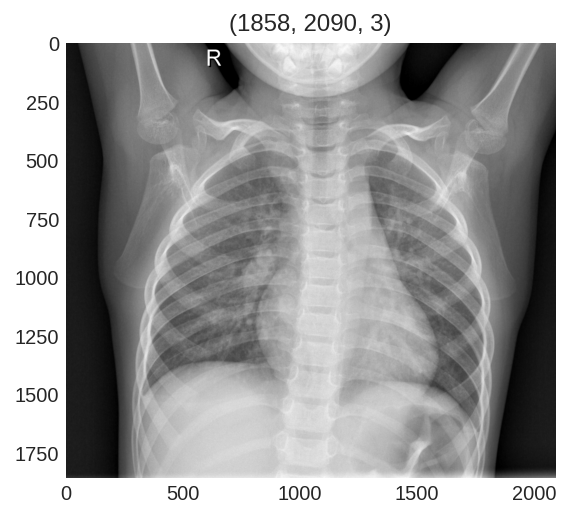

In [235]:
plt.imshow(cv2.imread(train_normal_img_list[0]))
plt.title(cv2.imread(train_normal_img_list[0]).shape)

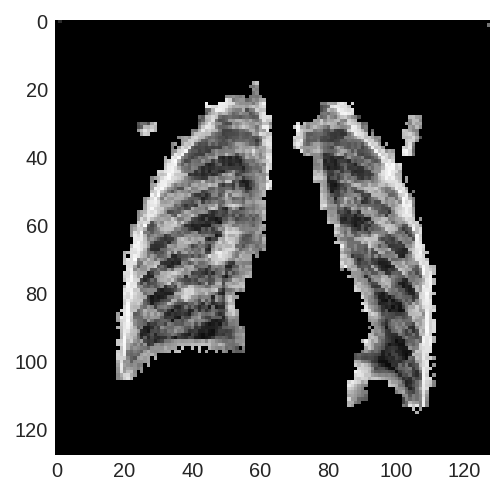

In [233]:
remove = rv_3ch(train_normal_img_list[0], train_normal_mask_list[0],(128,128))
plt.imshow(remove)

In [239]:
# NORMAL
train_normal_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/train/NORMAL/'+'*.jpeg')
train_normal_img_list.sort()

train_normal_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/train/NORMAL/'+'*.jpeg')
train_normal_mask_list.sort()

normal_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/NORMAL/'

format = '.jpg'

In [242]:
good = []
error = []
for img, mask in tqdm(zip(train_normal_img_list, train_normal_mask_list)):
    pat_id = img.split('NORMAL/')[1].split('.jpeg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(normal_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)

1341it [01:07, 19.83it/s]


In [243]:
#check  /content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/NORMAL
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/NORMAL/'+'*.jpg')))

1341


In [256]:
# BACTERIA
train_BACTERIA_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/train/BACTERIA/'+'*.jpg')
train_BACTERIA_img_list.sort()

train_BACTERIA_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/train/BACTERIA/'+'*.jpg')
train_BACTERIA_mask_list.sort()

BACTERIA_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/BACTERIA/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(train_BACTERIA_img_list, train_BACTERIA_mask_list)):
    pat_id = img.split('BACTERIA/')[1].split('.jpg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(BACTERIA_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)


#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/BACTERIA/'+'*.jpg')))

2530it [01:22, 30.60it/s]

2530


In [257]:
# VIRUS
train_VIRUS_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/train/VIRUS/'+'*.jpg')
train_VIRUS_img_list.sort()

train_VIRUS_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/train/VIRUS/'+'*.jpg')
train_VIRUS_mask_list.sort()

VIRUS_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/VIRUS/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(train_VIRUS_img_list, train_VIRUS_mask_list)):
    pat_id = img.split('VIRUS/')[1].split('.jpg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(VIRUS_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)


#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/train/VIRUS/'+'*.jpg')))

1345it [00:43, 30.83it/s]

1345


### TEST

In [260]:
# NORMAL
test_NORMAL_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/test/NORMAL/'+'*.jpeg')
test_NORMAL_img_list.sort() 

test_NORMAL_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/test/NORMAL/'+'*.jpeg')
test_NORMAL_mask_list.sort()

NORMAL_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/test/NORMAL/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(test_NORMAL_img_list, test_NORMAL_mask_list)):
    pat_id = img.split('NORMAL/')[1].split('.jpeg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(NORMAL_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)

print()

#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/test/NORMAL/'+'*.jpg')))

234it [00:10, 22.36it/s]


234


In [269]:
# BACTERIA
test_BACTERIA_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/test/BACTERIA/'+'*.jpg')
test_BACTERIA_img_list.sort() 

test_BACTERIA_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/test/BACTERIA/'+'*.jpg')
test_BACTERIA_mask_list.sort()

BACTERIA_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/test/BACTERIA/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(test_BACTERIA_img_list, test_BACTERIA_mask_list)):
    pat_id = img.split('BACTERIA/')[1].split('.jpg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(BACTERIA_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)

print()

#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/test/BACTERIA/'+'*.jpg')))

242it [00:06, 36.45it/s]


242


In [271]:
# VIRUS
test_VIRUS_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/test/VIRUS/'+'*.jpg')
test_VIRUS_img_list.sort() 

test_VIRUS_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/test/VIRUS/'+'*.jpg')
test_VIRUS_mask_list.sort()

VIRUS_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/test/VIRUS/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(test_VIRUS_img_list, test_VIRUS_mask_list)):
    pat_id = img.split('VIRUS/')[1].split('.jpg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(VIRUS_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)

print()

#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/test/VIRUS/'+'*.jpg')))

148it [00:04, 32.25it/s]


148


### VAL

In [263]:
# NORMAL
val_NORMAL_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/val/NORMAL/'+'*.jpeg')
val_NORMAL_img_list.sort() 

val_NORMAL_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/val/NORMAL/'+'*.jpeg')
val_NORMAL_mask_list.sort()

NORMAL_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/val/NORMAL/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(val_NORMAL_img_list, val_NORMAL_mask_list)):
    pat_id = img.split('NORMAL/')[1].split('.jpeg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(NORMAL_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)

print()

#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/val/NORMAL/'+'*.jpg')))

8it [00:00, 23.35it/s]


8


In [272]:
# BACTERIA
val_BACTERIA_img_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/val/BACTERIA/'+'*.jpg')
val_BACTERIA_img_list.sort() 

val_BACTERIA_mask_list = glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/val/BACTERIA/'+'*.jpg')
val_BACTERIA_mask_list.sort()

BACTERIA_save_dir = '/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/val/BACTERIA/'

format = '.jpg'

good = []
error = []
for img, mask in tqdm(zip(val_BACTERIA_img_list, val_BACTERIA_mask_list)):
    pat_id = img.split('BACTERIA/')[1].split('.jpg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(BACTERIA_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)

print()

#check  
print(len(glob('/content/drive/MyDrive/3차플젝drive/NEWFILE/BITWISE/val/BACTERIA/'+'*.jpg')))

8it [00:00, 37.80it/s]


8


### DATASET

In [294]:
normal_patient_id = os.listdir('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/train/NORMAL')
bacteria_patient_id = os.listdir('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/train/BACTERIA')
virus_patient_id = os.listdir('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/train/VIRUS')

In [281]:
if '.ipynb_checkpoints' in virus_patient_id:
    print('yes')
else:
    print('no')

no


In [295]:
normal_patient_id.sort()

In [297]:
len(normal_patient_id)

1341

In [290]:
new_norm_patient = []
for id in normal_patient_id:
    x = id.replace('.jpeg','')
    new_norm_patient.append(x)

In [298]:
len(set(new_norm_patient))

1341

In [ ]:
new_norm_patient

In [318]:
A = cv2.imread('/content/drive/MyDrive/3차플젝drive/NEWFILE/IMG/val/BACTERIA/person100_bacteria_475.jpg')
plt.imsave('/content/drive/MyDrive/3차플젝drive/NEWFILE/SAMPLE/A.jpg',A)

In [321]:
M = cv2.imread('/content/drive/MyDrive/3차플젝drive/NEWFILE/MASK/val/BACTERIA/person100_bacteria_475_predict.jpg')
plt.imsave('/content/drive/MyDrive/3차플젝drive/NEWFILE/SAMPLE/A_predict.jpg',M)

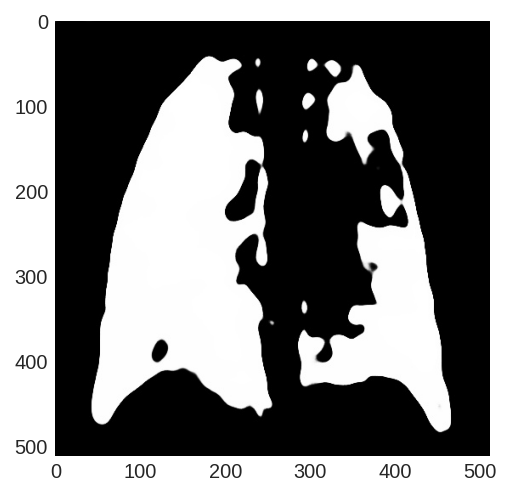

In [315]:
plt.imshow(M)

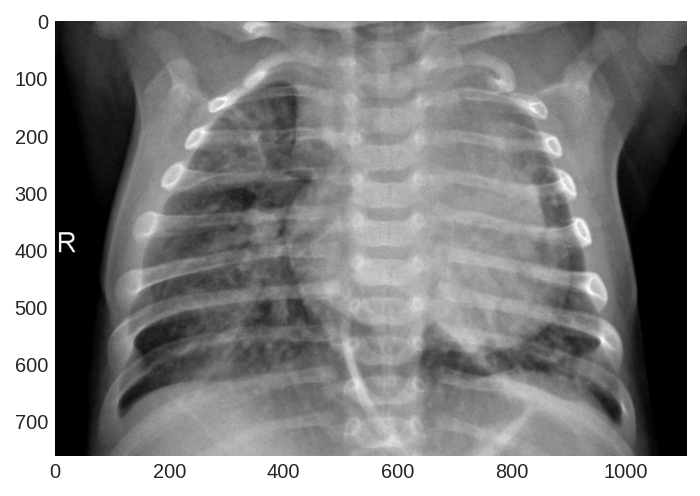

In [317]:
plt.imshow(A)

In [ ]:
img = '/content/drive/MyDrive/3차플젝drive/NEWFILE/SAMPLE/A.jpg'
mask = '/content/drive/MyDrive/3차플젝drive/NEWFILE/SAMPLE/A_predict.jpg'

 

In [ ]:
for img, mask in tqdm(zip(train_BACTERIA_img_list, train_BACTERIA_mask_list)):
    pat_id = img.split('BACTERIA/')[1].split('.jpg')[0]
    try:
        remove = rv_3ch(img, mask,(128,128))
        plt.imsave(BACTERIA_save_dir+pat_id+format,remove)
        good.append(img)
    except Exception as e:
        print(e)
        error.append(img)